# Load and plot RMSE's

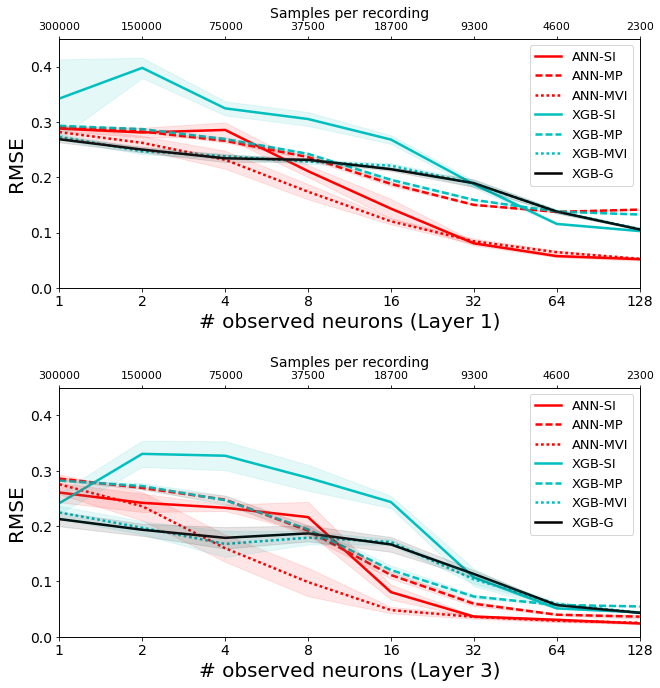

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/diffMethods_RMSEs'
fig, ax1 = pl.subplots(2,1, figsize=(10.4, 11), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.1)
ax1 = ax1.ravel()

networks = ['NN']
layers = [0,2]
nRecordings = 10
methods = ['NN','XGB','XGB']
methodLabels = ['ANN','XGB','XGB']
imputes = [['SI','MP','MVI'],['SI','MP','MVI'],['']]
imputeLabels = [['SI','MP','MVI'],['SI','MP','MVI'],['G']]
lstyles = ['-',  '--', ':','-.']
colors = ['r', 'c', 'k', 'g', 'b', 'm', 'y']

for iLS in range(len(layers)):
    iLayer = layers[iLS]
    x = [2**x for x in range(8)]
    x = range(len(x))
    ax1[iLS].set_xlim([0, len(x)-1])
    ax2 = ax1[iLS].twiny()
    for iMethod in range(len(methods)):
        for iImpute in range(len(imputes[iMethod])):
            #NNMP_RMSES_Layer2nRec10NN.dat
            fName = 'results/new/' + methods[iMethod] + imputes[iMethod][iImpute] + '_RMSES_Layer' \
                    + str(iLayer) + 'nRec' + str(nRecordings) + 'NN.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            #y = np.reshape(y,(8))
            error = np.std(np.mean(rmses, axis=1), axis=0)
            #error = np.reshape(error,(8))
            ax1[iLS].plot(x, y, label=methodLabels[iMethod]+'-'+ imputeLabels[iMethod][iImpute], 
                          linewidth=2.5, color=colors[iMethod], linestyle=lstyles[iImpute])
            pl.fill_between(x, y-error, y+error, alpha=0.1, color=colors[iMethod])


    legend = ax1[iLS].legend(loc='upper right', shadow=False, fontsize=13)
    ax1[iLS].set_xlabel('# observed neurons (Layer '+str(iLayer+1)+')', fontsize=20)
    ax2.set_xlabel('Samples per recording', fontsize=14)


    ax2.set_xlim(ax1[iLS].get_xlim())
    ax1[iLS].set_xticklabels( [2**x for x in range(8)], fontsize=14)
    nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

    ax2.set_xticklabels(nSamples, fontsize=11)
    ax1[iLS].set_ylabel('RMSE', fontsize=20)
    ax1[iLS].set_ylim([0, .45])
    ax1[iLS].set_yticks(np.arange(0,.45,.1))
    ax1[iLS].set_yticklabels(np.arange(0,.45,.1), fontsize=14)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)

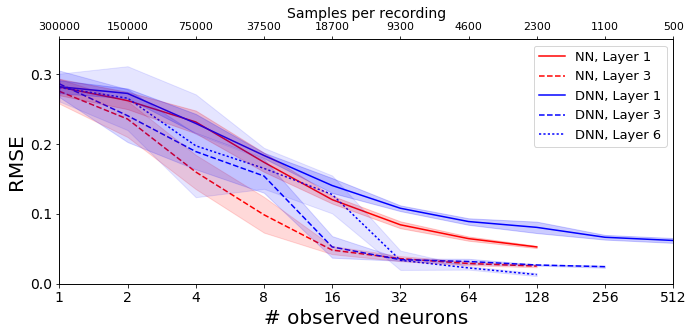

In [5]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/NNMVI_RMSEs_NN_vs_DNN'
x = [2**x for x in range(10)]
x = range(len(x))
fig = pl.figure(figsize=(11,4.5))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
nRecordings =10
methods =['']
#methodLabels =['XGB-G', 'XGB-MP']
lstyles =['-',  '--', ':']
colors =['r', 'b', 'r', 'k', 'c','g','y']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        ls = layers[iNetwork]
        for iLayer in range(0,len(ls)):
            #NNMVI_RMSES_Layer2_nRec10_NN.dat
            fName = 'results/NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_nRec10_' + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1.plot(x[0:rmses.shape[2]], y, label=networks[iNetwork]+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iNetwork],linestyle=lstyles[iLayer])
            pl.fill_between(x[0:rmses.shape[2]], y-error, y+error, alpha=0.2-0.05*iLayer, color=colors[iNetwork])


legend = ax1.legend(loc='upper right', shadow=False, fontsize=13)
ax1.set_xlabel('# observed neurons', fontsize=20)
ax2.set_xlabel('Samples per recording', fontsize=14)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(10)], fontsize=14)
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(10)])*100

ax2.set_xticklabels(nSamples, fontsize=11)
ax1.set_ylabel('RMSE', fontsize=20)
ax1.set_ylim([0, .35])
ax1.set_yticks(np.arange(0,.35,.1))
ax1.set_yticklabels(np.arange(0,.35,.1), fontsize=14)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


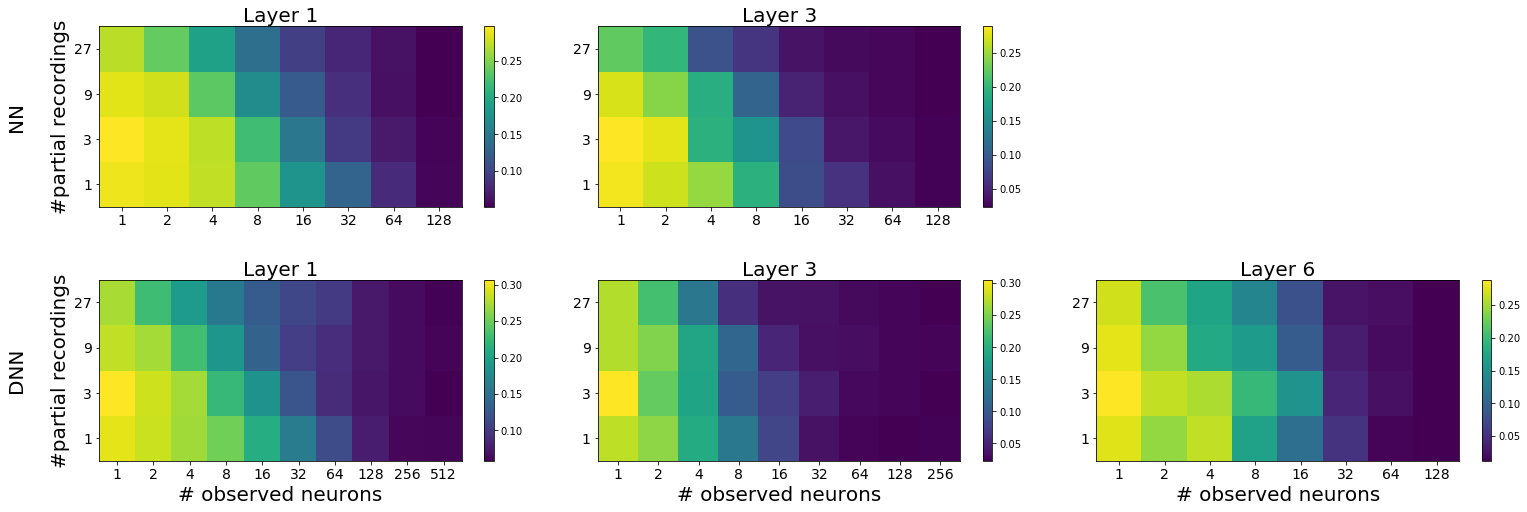

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/diffRec_NNMVI_RMSEs_NN_vs_DNN'

networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
recordings = [3**i for i in range(4)]
nRecordings = len(recordings)
nSubnetSize = [8,8,0,10,9,8]
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']

fig, ax = plt.subplots(2,3, figsize=(26, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.1)

ax = ax.ravel()

i = 0
for iNetwork in range(len(networks)):
    ls = layers[iNetwork]
    for iLayer in range(0,len(ls)):
        #NNMVI_RMSES_Layer2_multiRec_NN.dat
        fName = 'results/' + 'NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_multiRec_' + networks[iNetwork] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
                        
        RMSE = np.transpose(np.mean(np.mean(rmses, axis=1), axis=0))
        cax = ax[i].pcolor(RMSE)
        #fig.colorbar(cax)
        fig.colorbar(cax, ax=ax[i])
        ax[i].set_xticks(np.arange(0.5,nSubnetSize[i]+0.5))
        subnetSize = [2**j for j in range(nSubnetSize[i])]
        ax[i].set_xticklabels(subnetSize, fontsize=14)
        ax[i].set_yticks(np.arange(0.5,nRecordings+0.5))
        ax[i].set_yticklabels(recordings, fontsize=14)
        ax[i].set_title('Layer ' + str(ls[iLayer]+1), fontsize=20)

        if i>2:
            ax[i].set_xlabel('# observed neurons', fontsize=20)
            
        if i==0:
            ax[i].set_ylabel('NN\n\n#partial recordings', fontsize=20)
            
        if i==3:
            ax[i].set_ylabel('DNN\n\n#partial recordings', fontsize=20)
        
        i += 1
        if i==2:
            fig.delaxes(ax[i])
            i += 1

        
plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)
